In this notebook we present some useful routines for certain computations in Cosmology.

Let us define the Hubble's constant $H_0$.

In [121]:
Hzero =  1/(9.78*10^9) #years.

We are interested in computing the age of the Universe for given values of $\Omega_\Lambda$, $\Omega_{\mathrm{M}}$, $\Omega_{\mathrm{R}}$ and $h$, where we will take into account
$$
    1 = \Omega_\Lambda + \Omega_{\mathrm{R}} + \Omega_{\mathrm{M}} + \Omega_{\mathrm{k}},
$$
being $\Omega_{\mathrm{k}}$ the curvature density parameter, that for a flat spacetime is equal to 0. Therefore, the age of the Universe is given by
$$
    t_{\mathrm{U}} = \frac{1}{h H_0}\int_0^1 \mathrm{d}x \, \frac{1}{\sqrt{\Omega_\Lambda+\Omega_{\mathrm{M}}x^{-3}+\Omega_{\mathrm{R}}x^{-4}+(1 - \Omega_\Lambda - \Omega_{\mathrm{R}} - \Omega_{\mathrm{M}})x^{-2}}}.
$$

In [124]:
def AgeUniverse(OmegaLambda, OmegaM, OmegaR, h):
    Omegak = 1 - OmegaLambda - OmegaM - OmegaR
    return numerical_integral(1/(x*sqrt(OmegaLambda + OmegaM/x^3 + OmegaR/x^4 + Omegak/x^2)), 0, 1)[0]/(h*Hzero)

In [125]:
AgeUniverse(0.68,0.32,0,0.6711)

1.37973598140939e10

If we want to compute the age of the Universe for a given redshift $z$,
   $$
       t_{\mathrm{U}}(z) = \frac{1}{h H_0}\int_0^{1/(1+z)} \mathrm{d}x \, \frac{1}{\sqrt{\Omega_\Lambda+\Omega_{\mathrm{M}}x^{-3}+\Omega_{\mathrm{R}}x^{-4}+(1 - \Omega_\Lambda - \Omega_{\mathrm{R}} - \Omega_{\mathrm{M}})x^{-2}}}.
   $$

In [6]:
def AgeUniverseRedshift(OmegaLambda,OmegaM,OmegaR,h,z):
    Omegak = 1-OmegaLambda-OmegaM-OmegaR
    return integral(1/(x*sqrt(OmegaLambda+OmegaM/x^3+OmegaR/x^4+Omegak/x^2)),(x,0,1/(1+z)))/(h*Hzero)

In [5]:
AgeUniverseRedshift(0.75, 0.25, 0, 0.68, 1500)

329759.746260644

Plot of the difference between apparent and absolute magnitudes, i.e., $m-M$, for a given redshift in a zero curvature universe.

In [6]:
def RedshiftKZero(OmegaLambda,OmegaM,OmegaR,h,z):
    return integral(1/(x^2*sqrt(OmegaLambda+OmegaM/x^3+OmegaR/x^4)),(x,1/(1+z),1))*(1+z)*3*10^8/h
def mM(OmegaLambda,OmegaM,OmegaR,h,z):
    return 5*log(RedshiftKZero(OmegaLambda,OmegaM,OmegaR,h,z))/log(10.)

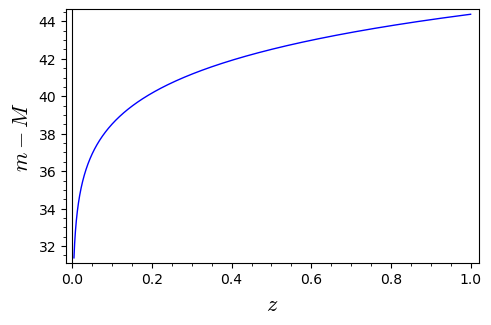

In [9]:
plot(mM(0.76, 0.24, 0, 0.64,x),(x,0.004,1), axes_labels=[r'$z$', r'$m-M$'],frame=True).show(figsize=5)

#### Consideramos un universo plano con solo materia. Calcula la edad del univero hoy y cuando z = 100. Asumir h = 0.68.

In [9]:
##     Omegak + OmegaLambda + OmegaM + OmegaR = 0
## En este caso, OmegaM = 1 y el resto 0.
## AgeUniverse(OmegaLambda,OmegaM,OmegaR,h)
show(AgeUniverse(0,1,0,0.68))

9.58823529411765e9

In [8]:
show(AgeUniverseRedshift(0,1,0,0.68,100))

939930.917960754*sqrt(101)

$$
D_{\mathrm{U}} = \frac{1}{H_0}\int_0^\infty \, \frac{\mathrm{d}z}{\sqrt{\Omega_\Lambda+\Omega_{\mathrm{M}}(1+z)^{-3}+\Omega_{\mathrm{R}}(1+z)^{-4}+\Omega_K(1+z)^{-2}}}.
$$

In [104]:
megaparsec_a_kilometros = 30856775812799586000

In [111]:
var('z')
def ProperDistanceUniverse(OmegaLambda,OmegaM,OmegaR,h):
    Hzero = h * 100
    c=299792 # km/s
    Omegak = round(1 - OmegaLambda-OmegaM-OmegaR, 3)
    return c*integral(1/(sqrt(OmegaLambda+OmegaM*(1+z)^3+OmegaR*(1+z)^4+Omegak*(1+z)^2)),(z,0,infinity), algorithm='mathematica_free')/(Hzero)
# La solución da en Mpa megaparsecs

In [112]:
ProperDistanceUniverse(0.69, 0.31, 0, 0.68)

14378.28884235294

In [27]:
def DistanceLuminosity(OmegaLambda,OmegaM,OmegaR,h):
    Omegak = 1-OmegaLambda-OmegaM-OmegaR
    return integral(1/(x*sqrt(OmegaLambda+OmegaM/x^3+OmegaR/x^4+Omegak/x^2)),(x,1/(1+z),1))/(h*Hzero)